In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [3]:
# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

In [13]:
# For reading stock data from yahoo
from pandas_datareader import DataReader

In [14]:
# To set starting end dates
from datetime import datetime

In [18]:
from __future__ import division


In [20]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [21]:
end = datetime.now()

start = datetime(end.year-1,end.month,end.day)

In [22]:
for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [30]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,282.459444,275.778334,278.781309,279.407063,3.551535e+07,278.314167
std,51.002198,49.852712,50.446267,50.516309,1.683488e+07,51.064014
min,198.070007,192.580002,195.410004,193.339996,1.165440e+07,191.059784
25%,242.980003,236.394997,239.207504,240.372498,2.432008e+07,238.440117
50%,280.985001,272.029999,276.639999,275.764999,3.119720e+07,275.020523
75%,319.529991,313.685005,316.372490,317.142494,4.138878e+07,316.243881
max,399.820007,386.970001,396.690002,393.429993,1.067212e+08,393.429993


In [31]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2019-07-26 to 2020-07-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       252 non-null    float64
 1   Low        252 non-null    float64
 2   Open       252 non-null    float64
 3   Close      252 non-null    float64
 4   Volume     252 non-null    float64
 5   Adj Close  252 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


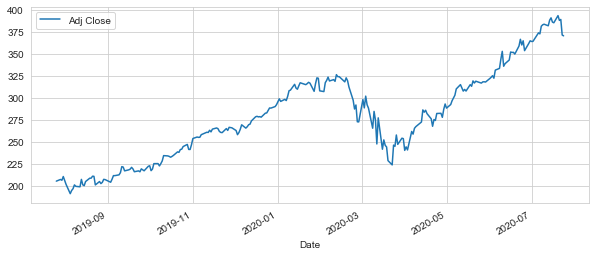

In [34]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

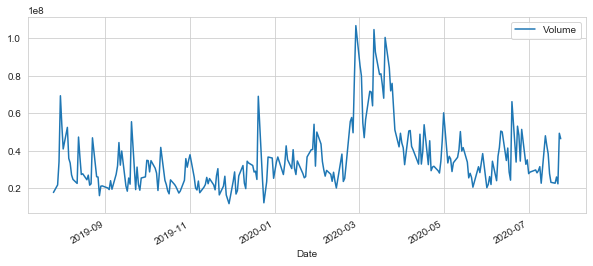

In [37]:
AAPL['Volume'].plot(legend=True, figsize=(10,4))

In [45]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = 'MA for %s day'%(str(ma))
    
    AAPL[column_name] = AAPL['Adj Close'].rolling(window=ma).mean()

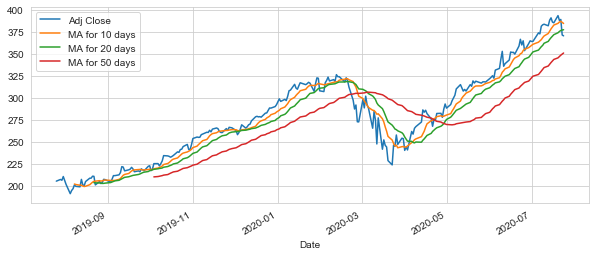

In [46]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

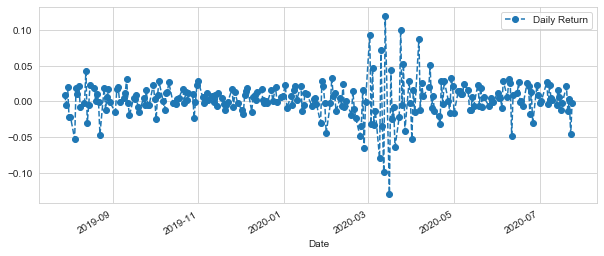

In [47]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize=(10,4), legend=True,linestyle='--', marker='o')

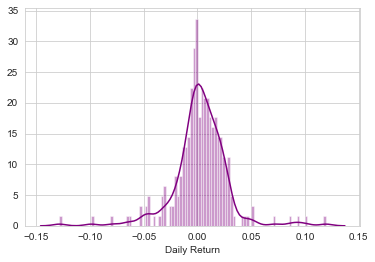

In [48]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple')

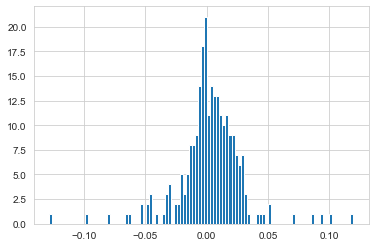

In [49]:
AAPL['Daily Return'].hist(bins=100)

In [52]:
closing_df = DataReader(tech_list, 'yahoo',start, end)['Adj Close']


In [53]:
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-07-26,205.289978,1250.410034,139.621902,1943.050049
2019-07-29,207.207077,1239.410034,139.315674,1912.449951
2019-07-30,206.317688,1225.140015,138.643936,1898.530029
2019-07-31,210.527466,1216.680054,134.613541,1866.780029
2019-08-01,205.971817,1209.010010,136.381760,1855.319946


In [54]:
tech_rets = closing_df.pct_change()

In [55]:
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-07-26,NaN,NaN,NaN,NaN
2019-07-29,0.009338,-0.008797,-0.002193,-0.015748
2019-07-30,-0.004292,-0.011514,-0.004822,-0.007279
2019-07-31,0.020404,-0.006905,-0.029070,-0.016723
2019-08-01,-0.021639,-0.006304,0.013136,-0.006139


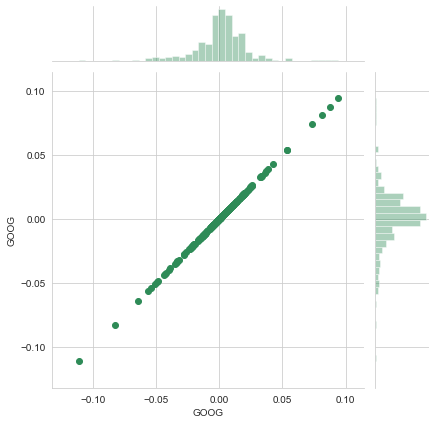

In [56]:
sns.jointplot('GOOG', 'GOOG', tech_rets, kind='scatter', color='seagreen')

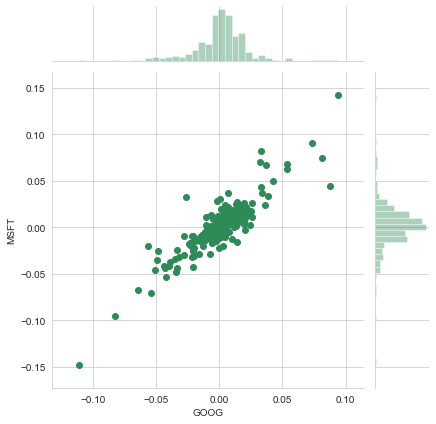

In [57]:
sns.jointplot('GOOG', 'MSFT', tech_rets, kind='scatter', color='seagreen')

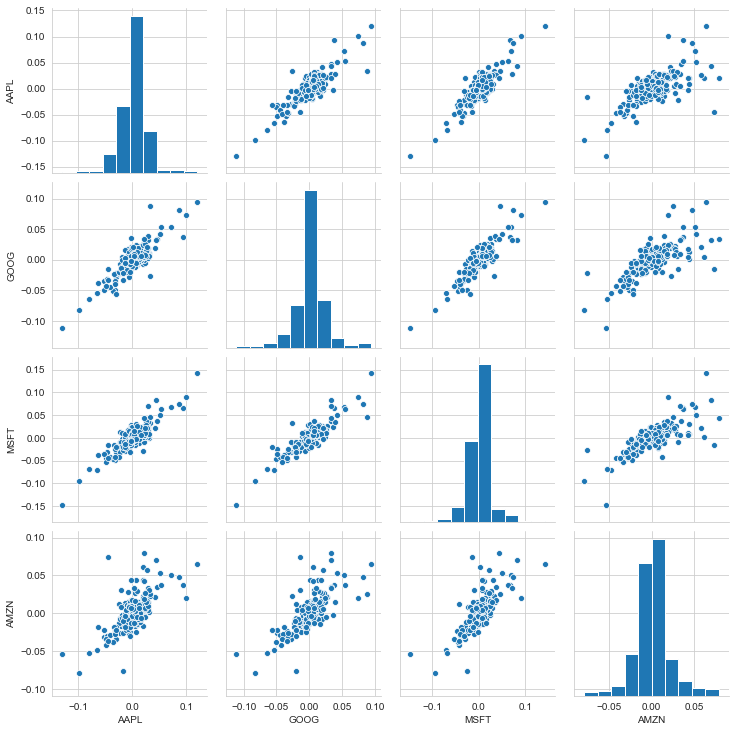

In [59]:
sns.pairplot(tech_rets.dropna())

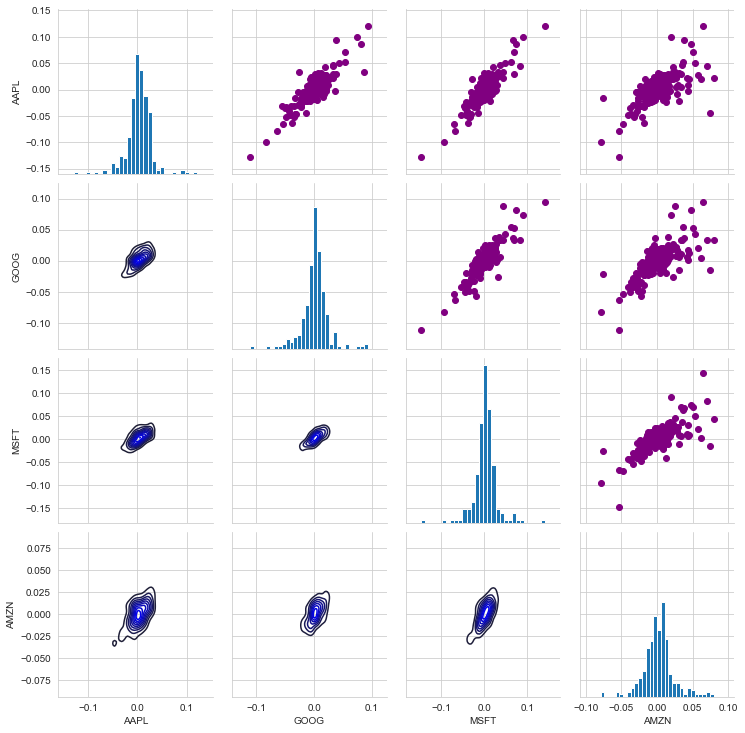

In [63]:
return_fig = sns.PairGrid(tech_rets.dropna())

return_fig.map_upper(plt.scatter,color='purple')

return_fig.map_lower(sns.kdeplot,color='blue')

return_fig.map_diag(plt.hist, bins=30)

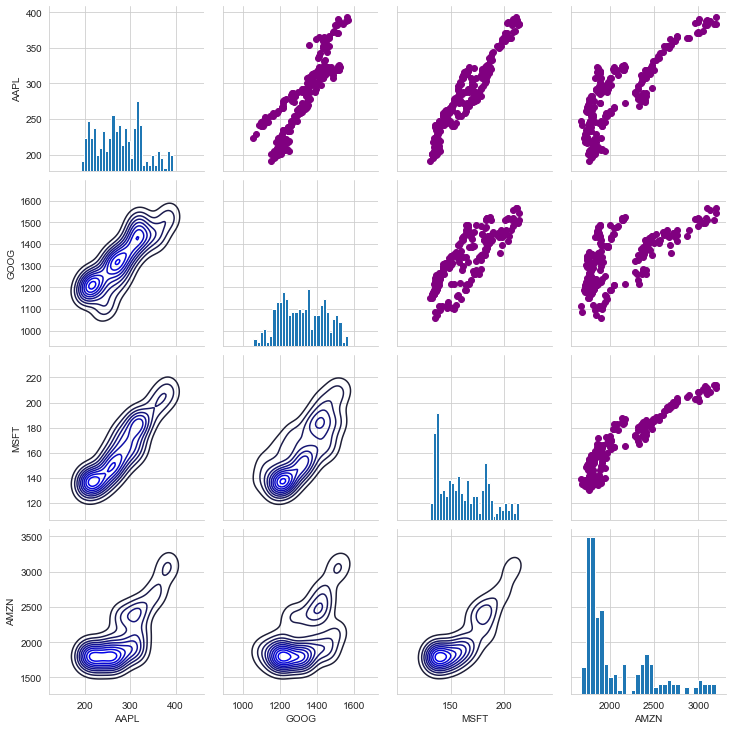

In [64]:
return_fig = sns.PairGrid(closing_df)

return_fig.map_upper(plt.scatter,color='purple')

return_fig.map_lower(sns.kdeplot,color='blue')

return_fig.map_diag(plt.hist, bins=30)

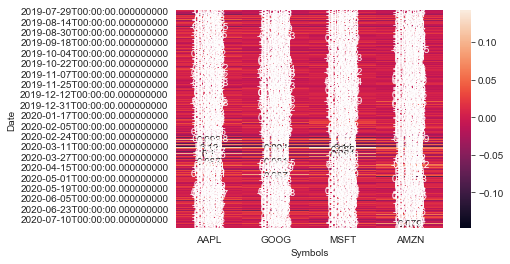

In [66]:
sns.heatmap(tech_rets.dropna(), annot=True)

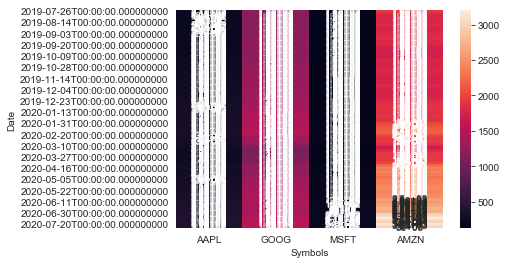

In [67]:
sns.heatmap(closing_df.dropna(), annot=True)

In [73]:
rets = tech_rets.dropna()

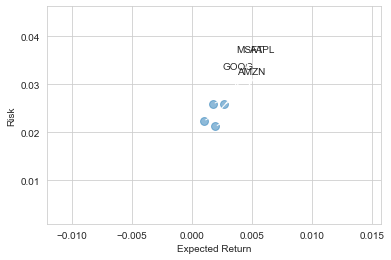

In [79]:
area = np.pi*20

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

    

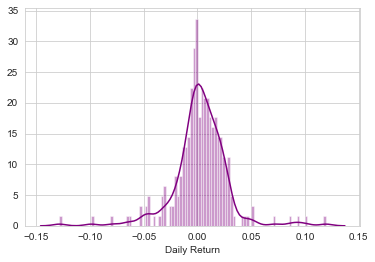

In [81]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple')

In [82]:
rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-07-29,0.009338,-0.008797,-0.002193,-0.015748
2019-07-30,-0.004292,-0.011514,-0.004822,-0.007279
2019-07-31,0.020404,-0.006905,-0.029070,-0.016723
2019-08-01,-0.021639,-0.006304,0.013136,-0.006139
2019-08-02,-0.021158,-0.012423,-0.008402,-0.017291


In [83]:
rets['AAPL'].quantile(0.05)

-0.038066392906385194

In [87]:
days = 365

dt = 1/days

mu = rets.mean()['GOOG']

sigma = rets.std()['GOOG']

In [88]:
def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        
        shock[x] = np.random.normal(loc=mu*dt, scale=sigma*np.sqrt(dt))
        
        drift[x] = mu * dt
        
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
    
    return price
        
        

In [89]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-07-26,1265.550049,1224.000000,1224.040039,1250.410034,4805800,1250.410034
2019-07-29,1247.369995,1228.229980,1241.050049,1239.410034,2223700,1239.410034
2019-07-30,1234.869995,1223.300049,1225.410034,1225.140015,1453300,1225.140015
2019-07-31,1234.000000,1207.764038,1223.000000,1216.680054,1725500,1216.680054
2019-08-01,1234.109985,1205.719971,1214.030029,1209.010010,1698500,1209.010010


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

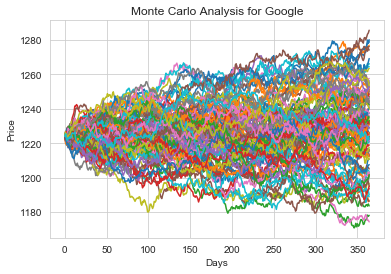

In [90]:
start_price = 1224.040039

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [93]:
runs = 2000

simulation = np.zeros(runs)

for run in range(runs):
    simulation[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

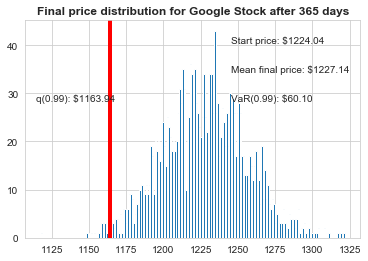

In [95]:
q = np.percentile(simulation,1)

plt.hist(simulation,bins=200)

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulation.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');